In [1]:
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("./mnist_data", one_hot=True)

Extracting ./mnist_data/train-images-idx3-ubyte.gz
Extracting ./mnist_data/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/t10k-labels-idx1-ubyte.gz


num_images:  55000
random index:  12807
label 7


/Users/neitan01/pyvenv/ut/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 54999 + 1) instead
  import sys


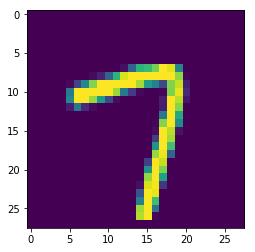

In [13]:
image_set = mnist.train.images
label_set = mnist.train.labels

num_images = image_set.shape[0]
print("num_images: ", num_images)

rand_index = np.random.random_integers(num_images - 1)
print("random index: ", rand_index)

label = label_set[rand_index]
image = image_set[rand_index]
print("label", np.argmax(label))

#print("shape of image: ", image.reshape((28,28)).shape)
image_2d = image.reshape((28,28))
imgplot = plt.imshow(image_2d)
# cv2.imshow('image', image)
# cv2.waitKey(0)

max:  0.9960785


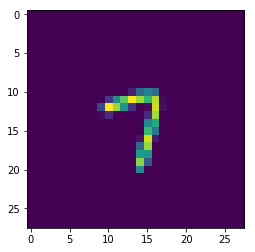

In [42]:
#works for single-channel 2D images only
def image_frame(input, output_dim, fill=0):
    output = np.full(output_dim, fill, dtype=input.dtype)
    delta_x = (input.shape[0] - output_dim[0]) / 2
    delta_y = (input.shape[1] - output_dim[1]) / 2

    if(delta_x >= 0):
        src_x0 = delta_x
        src_x1 = src_x0 + output_dim[0]
        dst_x0 = 0
        dst_x1 = output_dim[0]
    else:
        src_x0 = 0
        src_x1 = input.shape[0]
        dst_x0 = np.absolute(delta_x)
        dst_x1 = output_dim[0] + delta_x
        
    src_x0 = int(np.floor(src_x0))
    src_x1 = int(np.floor(src_x1))
    dst_x0 = int(np.floor(dst_x0))
    dst_x1 = int(np.floor(dst_x1))
    
    if(delta_y >= 0):
        src_y0 = delta_y
        src_y1 = src_y0 + output_dim[1]
        dst_y0 = 0
        dst_y1 = output_dim[1]
    else:
        src_y0 = 0
        src_y1 = input.shape[1]
        dst_y0 = np.absolute(delta_x)
        dst_y1 = output_dim[1] + delta_x

    src_y0 = int(np.floor(src_y0))
    src_y1 = int(np.floor(src_y1))
    dst_y0 = int(np.floor(dst_y0))
    dst_y1 = int(np.floor(dst_y1))
    
#     print("input x: ", input.shape[0])
#     print("input y: ", input.shape[1])
#     print("src_x0 ", src_x0)
#     print("src_x1 ", src_x1)
#     print("src_y0 ", src_y0)
#     print("src_y1 ", src_y1)
#     print("dst_x0 ", dst_x0)
#     print("dst_x1 ", dst_x1)
#     print("dst_y0 ", dst_y0)
#     print("dst_y1 ", dst_y1)
#     print("dst_y1 ", dst_y1)
#     print("output shape ", output.shape)
#     print("input ", input)
#     print("output ", output)
    
    #imgplot = plt.imshow(input[src_x0:src_x1, src_y0:src_y1])
    output[dst_x0:dst_x1, dst_y0:dst_y1] = input[src_x0:src_x1, src_y0:src_y1]
    
    return output

res = cv2.resize(image_2d,(int(image_2d.shape[0]*0.5), int(image_2d.shape[1]*0.5)), interpolation = cv2.INTER_LINEAR)
#imgplot = plt.imshow(res)
res = image_frame(res, (28, 28))
print("max: ", np.max(res))
imgplot = plt.imshow(res)
